In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import csv

# Dataset loading

In [3]:
datasetraw = pd.read_csv('../Y3 - Sample data/Z1 - dataset.csv', index_col = 0,)
print('dataset shape:', datasetraw.shape)
datasetraw.head()

dataset shape: (11399, 24)


,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness,...,bend_direction,deformation_length,possible_imperfection,bend_bend_distance,bend_bend_angle,merged_bend,punch_length,bend_edge_distance,bend_edge_angle,bend_edge_length
Y2 - Sample DXF\l1600360_flat1,3178.4895632067255,9,0,285678.08047400013,431798.45800000004,722.071,598.0,320484.60737549997,286893.71544200013,4.0,...,"['DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN']","[276.78907664300004, 661.9399541592159, 661.93...",NaN,"[[349.6564091054498, 456.5367257277253, 367.15...","[[-51.752951738074806, -51.752951738074806, 0....","[0, 0, 0, 0, 0]","[287.048, 675.4489008725974, 675.4489008725974...","[[6.066384837776125, 74.34, 1.118000000000009,...","[[90.0, 0.0, 76.98412580879429, 76.98485996027...","[[68.34000000000002, 265.5, 75.15284931391491,..."
Y2 - Sample DXF\l1600470_flat1,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,...,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR
Y2 - Sample DXF\l1600600_flat1,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,...,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR
Y2 - Sample DXF\l1600610_flat1,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,...,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR
Y2 - Sample DXF\l1600620_flat1,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,...,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR,ERROR


In [4]:
datasetraw.columns.values

array(['cut_length', 'num_closed_patterns', 'num_open_patterns',
       'total_area', 'minimum_rectangle_area', 'minimum_rectangle_dim1',
       'minimum_rectangle_dim2', 'convex_hull_area', 'no_hole_area',
       'thickness', 'unit', 'material', 'bend_radius', 'bend_angle',
       'bend_direction', 'deformation_length', 'possible_imperfection',
       'bend_bend_distance', 'bend_bend_angle', 'merged_bend',
       'punch_length', 'bend_edge_distance', 'bend_edge_angle',
       'bend_edge_length'], dtype=object)

In [5]:
print('parts with error', datasetraw[datasetraw['cut_length'] == 'ERROR'].shape[0])
print('parts error free', datasetraw[datasetraw['cut_length'] != 'ERROR'].shape[0])

parts with error 3244
parts error free 8155


In [6]:
#Dataset cleaning
dataset = datasetraw[datasetraw['cut_length'] != 'ERROR']
dataset.head()

,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness,...,bend_direction,deformation_length,possible_imperfection,bend_bend_distance,bend_bend_angle,merged_bend,punch_length,bend_edge_distance,bend_edge_angle,bend_edge_length
Y2 - Sample DXF\l1600360_flat1,3178.4895632067255,9,0,285678.08047400013,431798.45800000004,722.071,598.0,320484.60737549997,286893.71544200013,4.0,...,"['DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN']","[276.78907664300004, 661.9399541592159, 661.93...",NaN,"[[349.6564091054498, 456.5367257277253, 367.15...","[[-51.752951738074806, -51.752951738074806, 0....","[0, 0, 0, 0, 0]","[287.048, 675.4489008725974, 675.4489008725974...","[[6.066384837776125, 74.34, 1.118000000000009,...","[[90.0, 0.0, 76.98412580879429, 76.98485996027...","[[68.34000000000002, 265.5, 75.15284931391491,..."
Y2 - Sample DXF\l1600700_flat1,625.4298606689354,2,0,10823.930038499999,12758.999999999996,255.18,49.999999999999986,11152.315470999998,11152.315470999998,10.0,...,"['UP', 'UP']","[50.0, 50.0]",NaN,"[[75.74000000000001], [75.74000000000001]]","[[0.0], [0.0]]","[0, 0]","[59.999999999999986, 59.999999999999986]","[[50.597999999999985, 6.550999999999987, 6.552...","[[134.99925088867738, 90.0, 90.0, 90.0, 90.0, ...","[[54.0830621636756, 41.926000000000016, 56.084..."
Y2 - Sample DXF\l1600710_flat1,625.4298606689354,2,0,10823.930038499999,12758.999999999996,255.18,49.999999999999986,11152.315470999998,11152.315470999998,10.0,...,"['UP', 'UP']","[50.0, 50.0]",NaN,"[[75.74000000000001], [75.74000000000001]]","[[0.0], [0.0]]","[0, 0]","[59.999999999999986, 59.999999999999986]","[[50.597999999999985, 6.550999999999987, 6.552...","[[134.99925088867738, 90.0, 90.0, 90.0, 90.0, ...","[[54.0830621636756, 41.926000000000016, 56.084..."
Y2 - Sample DXF\l1600800_flat1,2065.9217769478273,17,0,59474.143992,92800.76841391344,304.63218545306967,304.6321854530696,72944.362272,72944.362272,NaN,...,[],[],NaN,[],[],[],[],[],[],[]
Y2 - Sample DXF\l1600870_flat1,305.1087606445365,3,0,1871.8818744999999,2987.152663686038,74.67954727997073,39.999608627611494,2392.145354499998,2392.1453545,NaN,...,[],[],NaN,[],[],[],[],[],[],[]


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8155 entries, Y2 - Sample DXF\l1600360_flat1 to Y2 - Sample DXF\l8841850_flat1
Data columns (total 24 columns):
cut_length                8155 non-null object
num_closed_patterns       8155 non-null object
num_open_patterns         8155 non-null object
total_area                8155 non-null object
minimum_rectangle_area    8155 non-null object
minimum_rectangle_dim1    8155 non-null object
minimum_rectangle_dim2    8155 non-null object
convex_hull_area          8155 non-null object
no_hole_area              8155 non-null object
thickness                 6768 non-null object
unit                      8155 non-null object
material                  8155 non-null object
bend_radius               8155 non-null object
bend_angle                8155 non-null object
bend_direction            8155 non-null object
deformation_length        8155 non-null object
possible_imperfection     726 non-null object
bend_bend_distance        8155 non-null objec

In [8]:
dataset.columns.values

array(['cut_length', 'num_closed_patterns', 'num_open_patterns',
       'total_area', 'minimum_rectangle_area', 'minimum_rectangle_dim1',
       'minimum_rectangle_dim2', 'convex_hull_area', 'no_hole_area',
       'thickness', 'unit', 'material', 'bend_radius', 'bend_angle',
       'bend_direction', 'deformation_length', 'possible_imperfection',
       'bend_bend_distance', 'bend_bend_angle', 'merged_bend',
       'punch_length', 'bend_edge_distance', 'bend_edge_angle',
       'bend_edge_length'], dtype=object)

In [9]:
tointeger = ['num_closed_patterns', 'num_open_patterns']
tofloat = ['cut_length', 'total_area', 'minimum_rectangle_area', 'minimum_rectangle_dim1',
           'minimum_rectangle_dim2', 'convex_hull_area', 'no_hole_area', 'thickness',]

for column in tointeger:
    dataset[column] = pd.to_numeric(dataset[column], downcast='integer', errors='ignore')
for column in tofloat:
    dataset[column] = pd.to_numeric(dataset[column], downcast='float', errors='ignore')

/Users/cricket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/cricket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
dataset.describe()

,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness
count,8155.000000,8155.000000,8155.000000,8.155000e+03,8.155000e+03,8155.000000,8155.000000,8.155000e+03,8.155000e+03,6768.000000
mean,1819.570679,6.670509,0.281055,1.026665e+05,1.532078e+05,489.351135,196.495743,1.277796e+05,1.086347e+05,7.462323
std,2100.646484,16.458701,1.565425,3.055052e+05,3.685242e+05,545.914246,177.759155,3.326232e+05,3.127872e+05,4.537411
min,9.473231,1.000000,0.000000,-3.671105e+05,2.205177e+00,2.995788,0.396390,1.923344e+00,1.690271e-16,1.000000
25%,685.058929,2.000000,0.000000,1.027755e+04,1.685925e+04,181.636108,83.500000,1.367213e+04,1.127351e+04,5.000000
50%,1229.238647,4.000000,0.000000,2.985956e+04,4.902000e+04,328.009003,150.156006,4.044688e+04,3.272329e+04,6.000000
75%,2159.443604,7.000000,0.000000,7.797023e+04,1.352472e+05,579.239532,248.418236,1.069030e+05,8.471675e+04,10.000000
max,28358.382812,409.000000,35.000000,5.504340e+06,6.134024e+06,4684.096191,1944.696045,5.885496e+06,5.644812e+06,90.000000


# Targets loading

In [11]:
priceset = pd.read_excel('../Y3 - Sample data/Valorisation_codes_L.xls')
print(priceset.shape)
priceset.head()

(31067, 7)


,VERSION,COSTE,COART,TPPRX,DTPRP,VAMAT,VALAJOUT
0,VALIDE,K,LPL0100,K,200901,15.58,0.0
1,VALIDE,K,LPL0120,K,200901,516.39,0.0
2,VALIDE,K,LPL0120A,K,200901,596.12,0.3
3,VALIDE,K,LPL0130A,K,200901,0.00,0.0
4,VALIDE,K,LPL0140A,K,200901,9.84,0.0


In [12]:
priceset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31067 entries, 0 to 31066
Data columns (total 7 columns):
VERSION     31067 non-null object
COSTE       31067 non-null object
COART       31067 non-null object
TPPRX       31067 non-null object
DTPRP       31067 non-null int64
VAMAT       31067 non-null float64
VALAJOUT    31067 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.7+ MB


In [13]:
#Date conversion
priceset['VALIDDATE'] = priceset['DTPRP'].apply(lambda x:pd.to_datetime(x, format='%Y%m', errors='ignore'))
priceset.head()

,VERSION,COSTE,COART,TPPRX,DTPRP,VAMAT,VALAJOUT,VALIDDATE
0,VALIDE,K,LPL0100,K,200901,15.58,0.0,2009-01-01
1,VALIDE,K,LPL0120,K,200901,516.39,0.0,2009-01-01
2,VALIDE,K,LPL0120A,K,200901,596.12,0.3,2009-01-01
3,VALIDE,K,LPL0130A,K,200901,0.00,0.0,2009-01-01
4,VALIDE,K,LPL0140A,K,200901,9.84,0.0,2009-01-01


In [14]:
#Total value calculation
priceset['VALTOT'] = priceset['VAMAT'] + priceset['VALAJOUT']
priceset.head()

,VERSION,COSTE,COART,TPPRX,DTPRP,VAMAT,VALAJOUT,VALIDDATE,VALTOT
0,VALIDE,K,LPL0100,K,200901,15.58,0.0,2009-01-01,15.58
1,VALIDE,K,LPL0120,K,200901,516.39,0.0,2009-01-01,516.39
2,VALIDE,K,LPL0120A,K,200901,596.12,0.3,2009-01-01,596.42
3,VALIDE,K,LPL0130A,K,200901,0.00,0.0,2009-01-01,0.00
4,VALIDE,K,LPL0140A,K,200901,9.84,0.0,2009-01-01,9.84


In [15]:
#Code article set as index
mask = priceset['COART'].duplicated(keep='last')
print('Number of dupplicates : ', priceset[mask].shape[0])
priceset.set_index('COART', inplace=True)
priceset.head()

Number of dupplicates :  0


,VERSION,COSTE,TPPRX,DTPRP,VAMAT,VALAJOUT,VALIDDATE,VALTOT
COART,,,,,,,,
LPL0100,VALIDE,K,K,200901,15.58,0.0,2009-01-01,15.58
LPL0120,VALIDE,K,K,200901,516.39,0.0,2009-01-01,516.39
LPL0120A,VALIDE,K,K,200901,596.12,0.3,2009-01-01,596.42
LPL0130A,VALIDE,K,K,200901,0.00,0.0,2009-01-01,0.00
LPL0140A,VALIDE,K,K,200901,9.84,0.0,2009-01-01,9.84


In [16]:
#Nothing is free !!
priceset = priceset[priceset['VAMAT']>0.1]
priceset = priceset[priceset['VALAJOUT']>0.1]
priceset = priceset[priceset['VALTOT']>0.1]

In [17]:
# and nothing should be more expensive than 300 euros...

priceset = priceset[priceset['VAMAT']<300]
priceset = priceset[priceset['VALAJOUT']<300]
priceset = priceset[priceset['VALTOT']<300]

In [18]:
priceset.describe()

,DTPRP,VAMAT,VALAJOUT,VALTOT
count,24576.000000,24576.000000,24576.000000,24576.000000
mean,201369.753743,14.557472,7.808255,22.365726
std,366.526099,31.120780,17.283920,44.069539
min,200901.000000,0.110000,0.110000,0.240000
25%,200901.000000,0.960000,1.270000,2.710000
50%,201507.000000,3.400000,2.580000,6.400000
75%,201710.000000,12.260000,5.490000,18.660000
max,201803.000000,296.830000,200.440000,299.920000


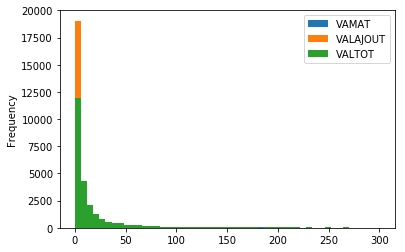

In [19]:
priceset[['VAMAT', 'VALAJOUT', 'VALTOT']].plot.hist(bins = 50)
plt.show()

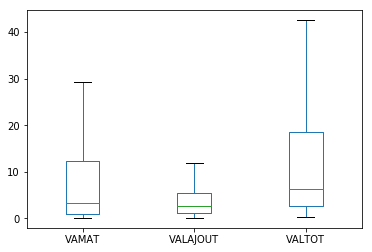

In [21]:
priceset[['VAMAT', 'VALAJOUT', 'VALTOT']].plot.box(sym='')
plt.show()

# Data preparation

In [19]:
#Project number extraction
dataset = dataset.reset_index()
dataset['project'] = dataset['index'].apply(lambda x: x.split('\\')[1][1:3])
dataset['COART'] = dataset['index'].apply(lambda x: x.split('\\')[1].upper()[:8])
mask = dataset['COART'].duplicated(keep='last')
print('Number of dupplicates : ', dataset[mask].shape[0])
dataset.set_index('COART', inplace=True)
dataset.head()

Number of dupplicates :  0


,index,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,...,deformation_length,possible_imperfection,bend_bend_distance,bend_bend_angle,merged_bend,punch_length,bend_edge_distance,bend_edge_angle,bend_edge_length,project
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,Y2 - Sample DXF\l1600360_flat1,3178.489502,9,0,285678.093750,431798.468750,722.070984,598.000000,320484.593750,286893.718750,...,"[276.78907664300004, 661.9399541592159, 661.93...",NaN,"[[349.6564091054498, 456.5367257277253, 367.15...","[[-51.752951738074806, -51.752951738074806, 0....","[0, 0, 0, 0, 0]","[287.048, 675.4489008725974, 675.4489008725974...","[[6.066384837776125, 74.34, 1.118000000000009,...","[[90.0, 0.0, 76.98412580879429, 76.98485996027...","[[68.34000000000002, 265.5, 75.15284931391491,...",16
L1600700,Y2 - Sample DXF\l1600700_flat1,625.429871,2,0,10823.929688,12759.000000,255.179993,50.000000,11152.315430,11152.315430,...,"[50.0, 50.0]",NaN,"[[75.74000000000001], [75.74000000000001]]","[[0.0], [0.0]]","[0, 0]","[59.999999999999986, 59.999999999999986]","[[50.597999999999985, 6.550999999999987, 6.552...","[[134.99925088867738, 90.0, 90.0, 90.0, 90.0, ...","[[54.0830621636756, 41.926000000000016, 56.084...",16
L1600710,Y2 - Sample DXF\l1600710_flat1,625.429871,2,0,10823.929688,12759.000000,255.179993,50.000000,11152.315430,11152.315430,...,"[50.0, 50.0]",NaN,"[[75.74000000000001], [75.74000000000001]]","[[0.0], [0.0]]","[0, 0]","[59.999999999999986, 59.999999999999986]","[[50.597999999999985, 6.550999999999987, 6.552...","[[134.99925088867738, 90.0, 90.0, 90.0, 90.0, ...","[[54.0830621636756, 41.926000000000016, 56.084...",16
L1600800,Y2 - Sample DXF\l1600800_flat1,2065.921875,17,0,59474.144531,92800.765625,304.632172,304.632172,72944.359375,72944.359375,...,[],NaN,[],[],[],[],[],[],[],16
L1600870,Y2 - Sample DXF\l1600870_flat1,305.108765,3,0,1871.881836,2987.152588,74.679550,39.999607,2392.145264,2392.145264,...,[],NaN,[],[],[],[],[],[],[],16


# Bend features creation

In [20]:
# Conversion from strings to bends
toconvert = ['bend_radius', 'bend_angle', 'bend_direction', 'deformation_length',
            'bend_bend_distance', 'bend_bend_angle', 'merged_bend', 'punch_length', 'bend_edge_distance',
            'bend_edge_angle', 'bend_edge_length']

def convert2array(entry):
    text = entry.replace('nan', '"nan"')
    try:
        return literal_eval(text if text != '"nan"' else [])
    except:
        return 'Error'


for convert in toconvert:
    try:
        print(convert, 'converted')
        dataset[convert] = dataset[convert].apply(convert2array)
    except:
        print(convert, 'NOT converted')
    
dataset[toconvert].head()

bend_radius converted
bend_angle converted
bend_direction converted
deformation_length converted
bend_bend_distance converted
bend_bend_angle converted
merged_bend converted
punch_length converted
bend_edge_distance converted
bend_edge_angle converted
bend_edge_length converted


,bend_radius,bend_angle,bend_direction,deformation_length,bend_bend_distance,bend_bend_angle,merged_bend,punch_length,bend_edge_distance,bend_edge_angle,bend_edge_length
COART,,,,,,,,,,,
L1600360,"[5.0, 5.0, 5.0, 5.0, 5.0]","[20.0, 77.3, 40.0, 20.0, 90.0]","[DOWN, DOWN, DOWN, DOWN, DOWN]","[276.78907664300004, 661.9399541592159, 661.93...","[[349.6564091054498, 456.5367257277253, 367.15...","[[-51.752951738074806, -51.752951738074806, 0....","[0, 0, 0, 0, 0]","[287.048, 675.4489008725974, 675.4489008725974...","[[6.066384837776125, 74.34, 1.118000000000009,...","[[90.0, 0.0, 76.98412580879429, 76.98485996027...","[[68.34000000000002, 265.5, 75.15284931391491,..."
L1600700,"[13.5, 13.5]","[45.0, 90.0]","[UP, UP]","[50.0, 50.0]","[[75.74000000000001], [75.74000000000001]]","[[0.0], [0.0]]","[0, 0]","[59.999999999999986, 59.999999999999986]","[[50.597999999999985, 6.550999999999987, 6.552...","[[134.99925088867738, 90.0, 90.0, 90.0, 90.0, ...","[[54.0830621636756, 41.926000000000016, 56.084..."
L1600710,"[13.5, 13.5]","[45.0, 90.0]","[UP, UP]","[50.0, 50.0]","[[75.74000000000001], [75.74000000000001]]","[[0.0], [0.0]]","[0, 0]","[59.999999999999986, 59.999999999999986]","[[50.597999999999985, 6.550999999999987, 6.552...","[[134.99925088867738, 90.0, 90.0, 90.0, 90.0, ...","[[54.0830621636756, 41.926000000000016, 56.084..."
L1600800,[],[],[],[],[],[],[],[],[],[],[]
L1600870,[],[],[],[],[],[],[],[],[],[],[]


In [21]:
#Verification that we have no error
dataset[dataset['deformation_length'] == 'Error']

,index,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,...,deformation_length,possible_imperfection,bend_bend_distance,bend_bend_angle,merged_bend,punch_length,bend_edge_distance,bend_edge_angle,bend_edge_length,project
COART,,,,,,,,,,,,,,,,,,,,,


In [22]:
#Calculate the number of bends with different radius
dataset['radius_count'] = dataset['bend_radius'].apply(lambda x: len(set(x)))
dataset['direction_count'] = dataset['bend_direction'].apply(lambda x: len(set(x)))
dataset.head()

,index,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,...,bend_bend_distance,bend_bend_angle,merged_bend,punch_length,bend_edge_distance,bend_edge_angle,bend_edge_length,project,radius_count,direction_count
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,Y2 - Sample DXF\l1600360_flat1,3178.489502,9,0,285678.093750,431798.468750,722.070984,598.000000,320484.593750,286893.718750,...,"[[349.6564091054498, 456.5367257277253, 367.15...","[[-51.752951738074806, -51.752951738074806, 0....","[0, 0, 0, 0, 0]","[287.048, 675.4489008725974, 675.4489008725974...","[[6.066384837776125, 74.34, 1.118000000000009,...","[[90.0, 0.0, 76.98412580879429, 76.98485996027...","[[68.34000000000002, 265.5, 75.15284931391491,...",16,1,1
L1600700,Y2 - Sample DXF\l1600700_flat1,625.429871,2,0,10823.929688,12759.000000,255.179993,50.000000,11152.315430,11152.315430,...,"[[75.74000000000001], [75.74000000000001]]","[[0.0], [0.0]]","[0, 0]","[59.999999999999986, 59.999999999999986]","[[50.597999999999985, 6.550999999999987, 6.552...","[[134.99925088867738, 90.0, 90.0, 90.0, 90.0, ...","[[54.0830621636756, 41.926000000000016, 56.084...",16,1,1
L1600710,Y2 - Sample DXF\l1600710_flat1,625.429871,2,0,10823.929688,12759.000000,255.179993,50.000000,11152.315430,11152.315430,...,"[[75.74000000000001], [75.74000000000001]]","[[0.0], [0.0]]","[0, 0]","[59.999999999999986, 59.999999999999986]","[[50.597999999999985, 6.550999999999987, 6.552...","[[134.99925088867738, 90.0, 90.0, 90.0, 90.0, ...","[[54.0830621636756, 41.926000000000016, 56.084...",16,1,1
L1600800,Y2 - Sample DXF\l1600800_flat1,2065.921875,17,0,59474.144531,92800.765625,304.632172,304.632172,72944.359375,72944.359375,...,[],[],[],[],[],[],[],16,0,0
L1600870,Y2 - Sample DXF\l1600870_flat1,305.108765,3,0,1871.881836,2987.152588,74.679550,39.999607,2392.145264,2392.145264,...,[],[],[],[],[],[],[],16,0,0


highest number of bend observed on dataset  20
count    8155.000000
mean        1.121521
std         1.669702
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        20.000000
Name: bend_count, dtype: float64


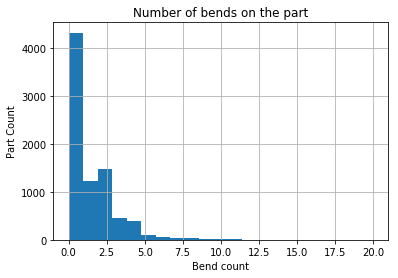

In [23]:
#Maximum number of bends
dataset['bend_count'] = dataset['bend_radius'].apply(lambda x: len(x))
maxnumbend = dataset['bend_count'].max()
print('highest number of bend observed on dataset ', maxnumbend)
print(dataset['bend_count'].describe())
dataset['bend_count'].plot.hist(bins=21)
plt.title('Number of bends on the part')
plt.xlabel('Bend count')
plt.ylabel('Part Count')
plt.grid(True)
#plt.show()

In [24]:
# UP-DOWN conversion
dataset['bend_direction'] = dataset['bend_direction'].apply(lambda cell: [1 if x=='UP' else -1 for x in cell])
dataset[['bend_direction']].head()

,bend_direction
COART,
L1600360,"[-1, -1, -1, -1, -1]"
L1600700,"[1, 1]"
L1600710,"[1, 1]"
L1600800,[]
L1600870,[]


In [25]:
#Definition othe number of bends to consider
bendcount = 15 #Max 2 digits, pythonic count

In [26]:
#Bends unpacking

toconvert_l2 = ['bend_bend_distance', 'bend_bend_angle', 'bend_edge_distance', 'bend_edge_angle', 'bend_edge_length']

#Unpack first level
for index in range(bendcount):
    for bend_info in toconvert:
        dataset['{}_{:02d}'.format(bend_info, index)] = dataset[bend_info].apply(lambda x: x[index] if len(x)>=index+1 else [])

#Create the list of second level
tounpack = []
for index in range(bendcount):
    tounpack.extend(['{}_{:02d}'.format(x, index) for x in toconvert_l2])    
    
for column in tounpack:
    index = int(column[-2:])
    rootname = column[:-3]
    dataset['{}_mean_{:02d}'.format(rootname, index)] = dataset[column].apply(lambda x: np.nanmean(x) if len(x) !=0 else [])
    dataset['{}_std_{:02d}'.format(rootname, index)]  = dataset[column].apply(lambda x: np.nanstd(x) if len(x) !=0 else [])
    dataset['{}_min_{:02d}'.format(rootname, index)]  = dataset[column].apply(lambda x: np.nanmin(x) if len(x) !=0 else [])
    dataset['{}_max_{:02d}'.format(rootname, index)]  = dataset[column].apply(lambda x: np.nanmax(x) if len(x) !=0 else [])

dataset = dataset.drop(tounpack, axis=1)
print(dataset.shape)
dataset.head()


(8155, 419)


,index,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,...,bend_edge_distance_min_14,bend_edge_distance_max_14,bend_edge_angle_mean_14,bend_edge_angle_std_14,bend_edge_angle_min_14,bend_edge_angle_max_14,bend_edge_length_mean_14,bend_edge_length_std_14,bend_edge_length_min_14,bend_edge_length_max_14
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,Y2 - Sample DXF\l1600360_flat1,3178.489502,9,0,285678.093750,431798.468750,722.070984,598.000000,320484.593750,286893.718750,...,[],[],[],[],[],[],[],[],[],[]
L1600700,Y2 - Sample DXF\l1600700_flat1,625.429871,2,0,10823.929688,12759.000000,255.179993,50.000000,11152.315430,11152.315430,...,[],[],[],[],[],[],[],[],[],[]
L1600710,Y2 - Sample DXF\l1600710_flat1,625.429871,2,0,10823.929688,12759.000000,255.179993,50.000000,11152.315430,11152.315430,...,[],[],[],[],[],[],[],[],[],[]
L1600800,Y2 - Sample DXF\l1600800_flat1,2065.921875,17,0,59474.144531,92800.765625,304.632172,304.632172,72944.359375,72944.359375,...,[],[],[],[],[],[],[],[],[],[]
L1600870,Y2 - Sample DXF\l1600870_flat1,305.108765,3,0,1871.881836,2987.152588,74.679550,39.999607,2392.145264,2392.145264,...,[],[],[],[],[],[],[],[],[],[]


In [27]:
#replacing all the empty brackets
for column in dataset.columns.values:
    dataset[column] = dataset[column].apply(lambda x: 0 if type(x)==list else x)

In [28]:
#Shows the specs of just a bend
bend = 1
bend_col = [x for x in dataset.columns.values if x.endswith('_{:02d}'.format(bend))]
dataset[bend_col].head()

,bend_radius_01,bend_angle_01,bend_direction_01,deformation_length_01,merged_bend_01,punch_length_01,bend_bend_distance_mean_01,bend_bend_distance_std_01,bend_bend_distance_min_01,bend_bend_distance_max_01,...,bend_edge_distance_min_01,bend_edge_distance_max_01,bend_edge_angle_mean_01,bend_edge_angle_std_01,bend_edge_angle_min_01,bend_edge_angle_max_01,bend_edge_length_mean_01,bend_edge_length_std_01,bend_edge_length_min_01,bend_edge_length_max_01
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,5.0,77.3,-1,661.94,0,675.448901,337.597106,27.152293,299.307554,372.999653,...,4.32181,521.482509,53.384945,39.574027,0.000012,128.737812,140.043438,163.737090,29.010676,594.972659
L1600700,13.5,90.0,1,50,0,60.000000,75.740000,0.000000,75.740000,75.740000,...,0.00000,126.338000,90.000000,20.124277,45.000749,134.999251,50.383512,17.277866,26.206000,80.169000
L1600710,13.5,90.0,1,50,0,60.000000,75.740000,0.000000,75.740000,75.740000,...,0.00000,126.338000,90.000000,20.124277,45.000749,134.999251,50.383512,17.277866,26.206000,80.169000
L1600800,0.0,0.0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L1600870,0.0,0.0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# data assembly

In [29]:
# Index reset
dataset = dataset.reset_index()
priceset = priceset.reset_index()
print('dataset shape', dataset.shape)
print('priceset shape', priceset.shape)

dataset shape (8155, 420)
priceset shape (24576, 9)


In [30]:
#Data merge
Kset = pd.merge(dataset, priceset, on='COART', how='inner')
print(Kset.shape)
Kset.head()

(5983, 428)


,COART,index,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,...,bend_edge_length_min_14,bend_edge_length_max_14,VERSION,COSTE,TPPRX,DTPRP,VAMAT,VALAJOUT,VALIDDATE,VALTOT
0,L1600360,Y2 - Sample DXF\l1600360_flat1,3178.489502,9,0,285678.093750,431798.468750,722.070984,598.000000,320484.593750,...,0.0,0.0,VALIDE,K,K,201710,12.51,5.15,2017-10-01,17.66
1,L1600700,Y2 - Sample DXF\l1600700_flat1,625.429871,2,0,10823.929688,12759.000000,255.179993,50.000000,11152.315430,...,0.0,0.0,VALIDE,K,K,201710,0.75,1.61,2017-10-01,2.36
2,L1600710,Y2 - Sample DXF\l1600710_flat1,625.429871,2,0,10823.929688,12759.000000,255.179993,50.000000,11152.315430,...,0.0,0.0,VALIDE,K,K,201710,0.75,1.61,2017-10-01,2.36
3,L1600800,Y2 - Sample DXF\l1600800_flat1,2065.921875,17,0,59474.144531,92800.765625,304.632172,304.632172,72944.359375,...,0.0,0.0,VALIDE,K,K,201302,10.46,4.36,2013-02-01,14.82
4,L1600870,Y2 - Sample DXF\l1600870_flat1,305.108765,3,0,1871.881836,2987.152588,74.679550,39.999607,2392.145264,...,0.0,0.0,VALIDE,K,K,201710,0.15,0.75,2017-10-01,0.90


In [31]:
#Many cost are missing...
missing = [coart for coart in dataset['COART'].tolist() if coart not in Kset['COART'].tolist()]
print(len(missing)," missing codes articles, saved in a local file")
if len(missing) >0:
    with open('missing_coart.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(missing)


2172  missing codes articles, saved in a local file


# Data cleaning

In [32]:
mask = Kset['thickness'].isna()
df=Kset[mask]
df=df['COART']
df.to_csv('missing_thickness.csv')
df.shape

(984,)

In [33]:
Kset = Kset.dropna(subset=['thickness'])
Kset.shape

(4999, 428)

In [34]:
#Possible imperfection no longer needed
Kset = Kset.drop('possible_imperfection', axis=1)

In [35]:
for index, nancount in Kset.isnull().sum().iteritems():
    if nancount != 0:
        print(index, '-->', nancount)
else:
    print('Done !')

Done !


In [36]:
Kset.shape

(4999, 427)

In [37]:
Kset.columns.values

array(['COART', 'index', 'cut_length', 'num_closed_patterns',
       'num_open_patterns', 'total_area', 'minimum_rectangle_area',
       'minimum_rectangle_dim1', 'minimum_rectangle_dim2',
       'convex_hull_area', 'no_hole_area', 'thickness', 'unit',
       'material', 'bend_radius', 'bend_angle', 'bend_direction',
       'deformation_length', 'bend_bend_distance', 'bend_bend_angle',
       'merged_bend', 'punch_length', 'bend_edge_distance',
       'bend_edge_angle', 'bend_edge_length', 'project', 'radius_count',
       'direction_count', 'bend_count', 'bend_radius_00', 'bend_angle_00',
       'bend_direction_00', 'deformation_length_00', 'merged_bend_00',
       'punch_length_00', 'bend_radius_01', 'bend_angle_01',
       'bend_direction_01', 'deformation_length_01', 'merged_bend_01',
       'punch_length_01', 'bend_radius_02', 'bend_angle_02',
       'bend_direction_02', 'deformation_length_02', 'merged_bend_02',
       'punch_length_02', 'bend_radius_03', 'bend_angle_03',
       

# Data exploration

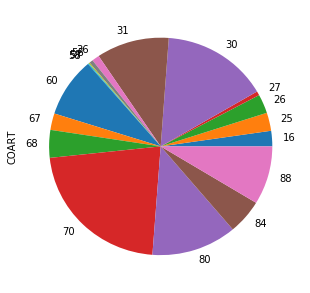

In [38]:
#Project proportion
df = Kset.groupby('project')['COART'].count()
plt.figsize=(5,5)
df.plot.pie(figsize=(5,5))
plt.show()

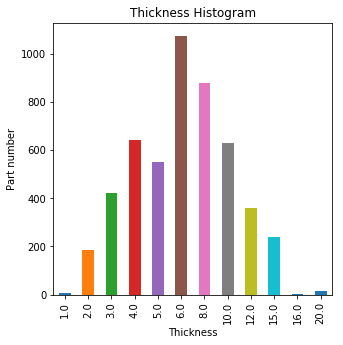

In [39]:
#Thickness proportion
df = Kset.groupby('thickness')['COART'].count()
df = df.sort_index()
df.plot.bar(figsize=(5,5))
plt.title('Thickness Histogram')
plt.xlabel('Thickness')
plt.ylabel('Part number')
plt.show()

In [40]:
maxthickness = 20

print('Parts with thickness over', maxthickness, '-->', Kset[Kset['thickness'] >20].shape[0])
Kset = Kset[Kset['thickness'] <=maxthickness]
Kset.shape

Parts with thickness over 20 --> 0


(4999, 427)

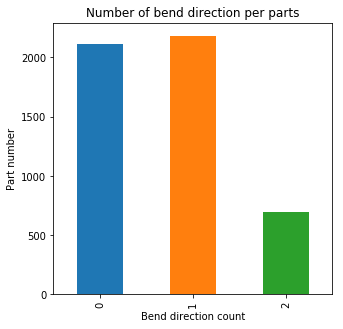

In [41]:
# Bend direction
df = Kset.groupby('direction_count')['COART'].count()
df = df.sort_index()
df.plot.bar(figsize=(5,5))
plt.title('Number of bend direction per parts')
plt.xlabel('Bend direction count')
plt.ylabel('Part number')
plt.show()

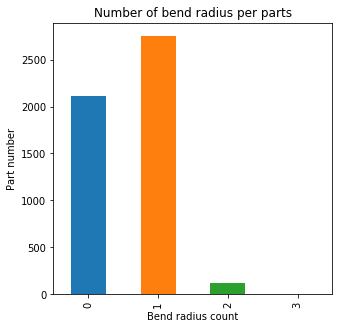

In [42]:
# Bend direction
df = Kset.groupby('radius_count')['COART'].count()
df = df.sort_index()
df.plot.bar(figsize=(5,5))
plt.title('Number of bend radius per parts')
plt.xlabel('Bend radius count')
plt.ylabel('Part number')
plt.show()

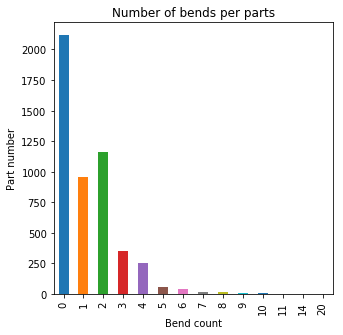

In [43]:
# direction
df = Kset.groupby('bend_count')['COART'].count()
df = df.sort_index()
df.plot.bar(figsize=(5,5))
plt.title('Number of bends per parts')
plt.xlabel('Bend count')
plt.ylabel('Part number')
plt.show()

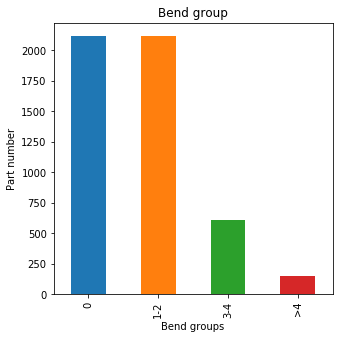

In [44]:
# Bend group creation
def bendgroupcalc(entry):
    if entry == 0:
        return '0'
    elif entry <= 2:
        return '1-2'
    elif entry <= 4:
        return '3-4'
    else:
        return '>4'
    return 'None'

Kset['bend_group'] = Kset['bend_count'].apply(bendgroupcalc)

# direction
df = Kset.groupby('bend_group')['COART'].count()
df.plot.bar(figsize=(5,5))
plt.title('Bend group')
plt.xlabel('Bend groups')
plt.ylabel('Part number')
plt.show()

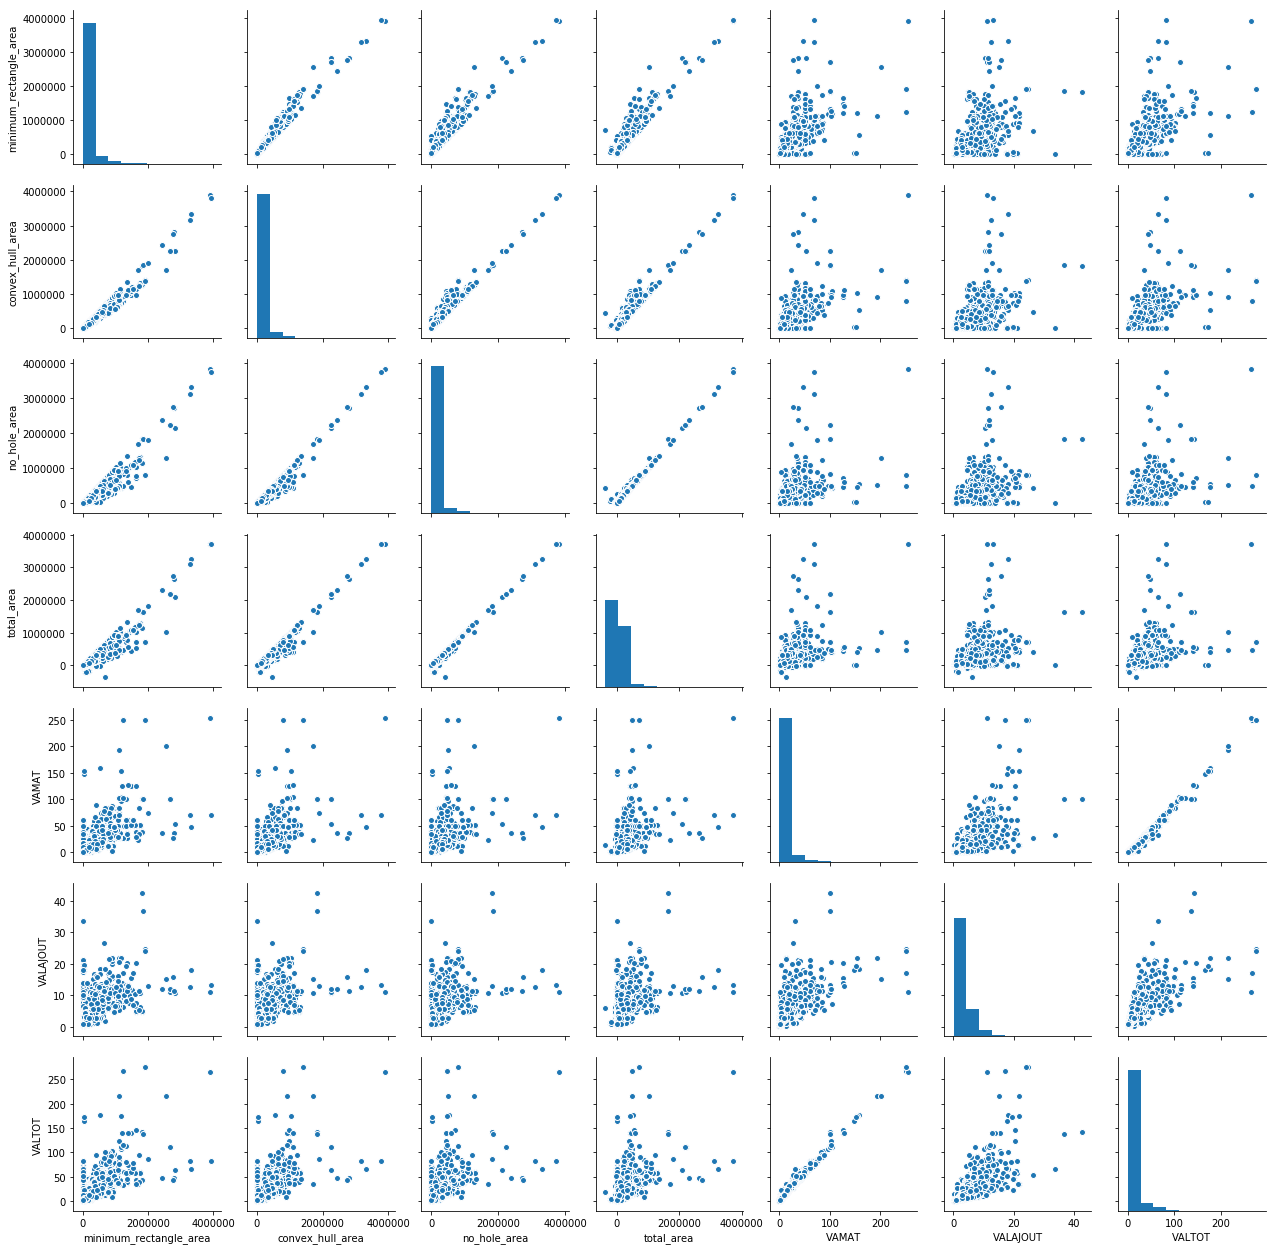

In [45]:
#Material aspect
toplot = [ 'minimum_rectangle_area', 'convex_hull_area', 'no_hole_area', 'total_area','VAMAT', 'VALAJOUT', 'VALTOT',]
sns.pairplot(Kset[toplot])

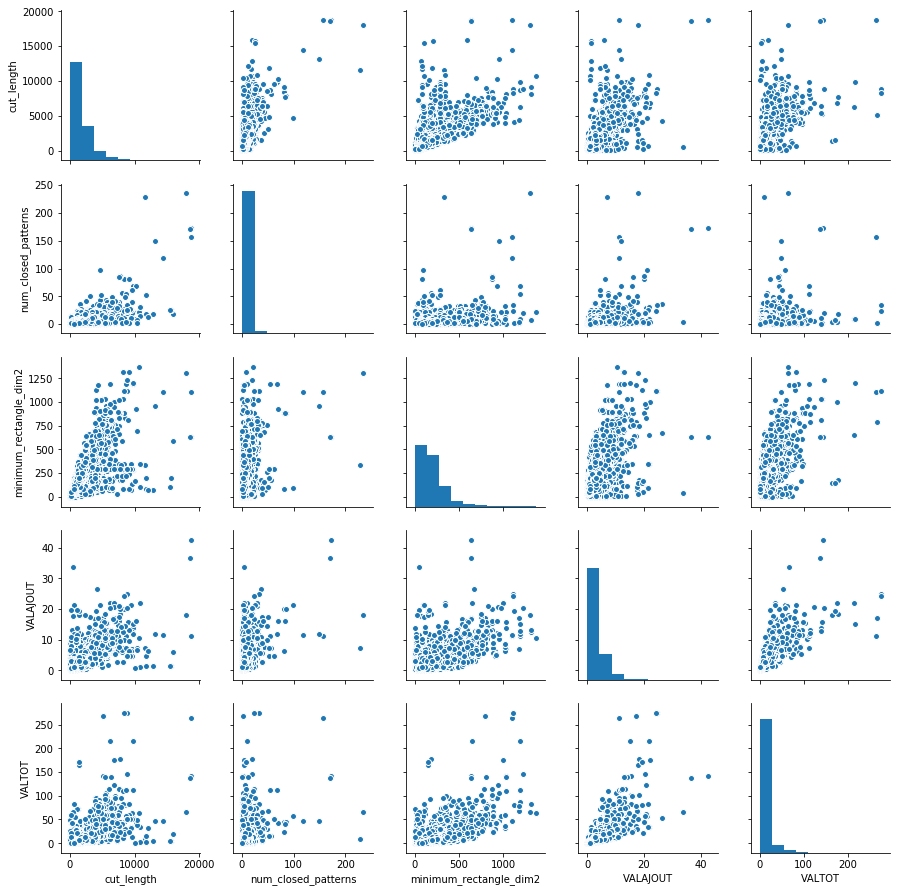

In [46]:
#Laser cut aspect
toplot = ['cut_length', 'num_closed_patterns', 'minimum_rectangle_dim2','VALAJOUT', 'VALTOT']
sns.pairplot(Kset[toplot])

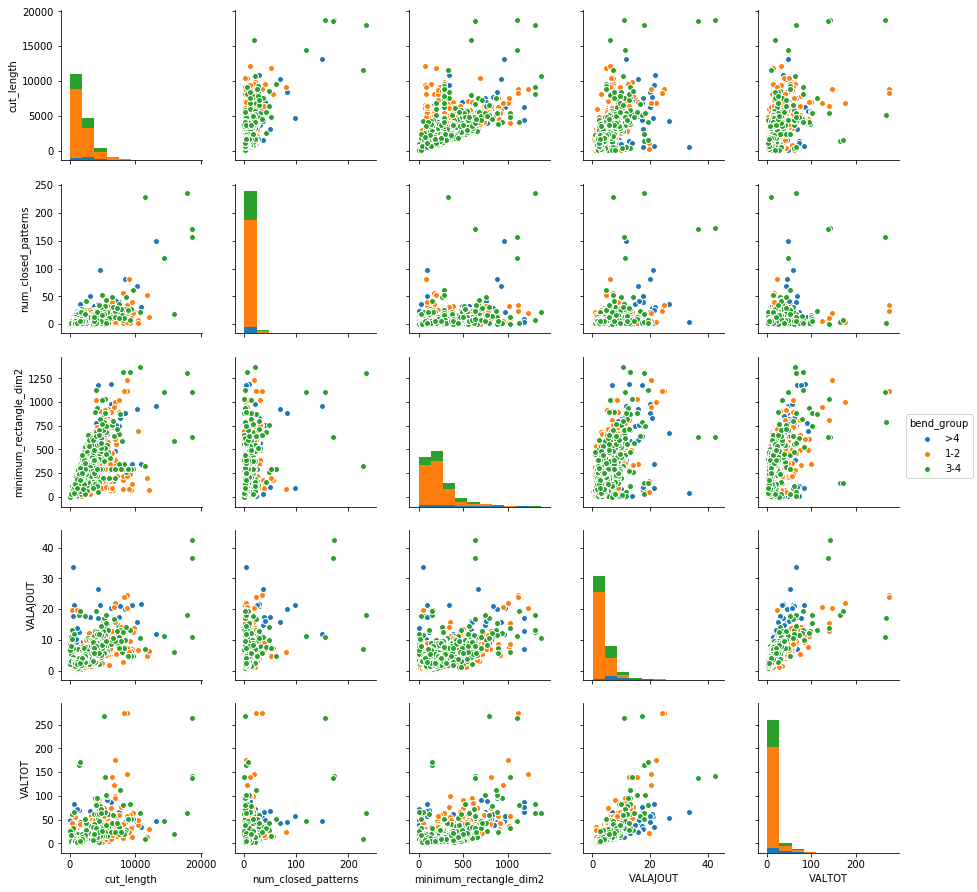

In [47]:
#bending aspect
df = Kset[Kset['bend_group'] != '0']
toplot = ['cut_length', 'num_closed_patterns', 'minimum_rectangle_dim2','VALAJOUT', 'VALTOT', 'bend_group']
sns.pairplot(df[toplot], hue = 'bend_group')

# Cleaned dataset saving

In [48]:
Kset.set_index('COART', inplace=True)

In [49]:
startcol = Kset.columns.values
todrop = ['index', 'unit', 'material', 'bend_radius', 'bend_angle', 'bend_direction', 'deformation_length', 'bend_bend_distance',
          'bend_bend_angle', 'merged_bend', 'punch_length', 'bend_edge_distance', 'bend_edge_angle',
          'bend_edge_length', 'project', 'VERSION', 'COSTE', 'TPPRX', 'DTPRP', 'VALIDDATE',
         ]

tokeep = [x for x in startcol if x not in todrop]
tokeep

['cut_length',
 'num_closed_patterns',
 'num_open_patterns',
 'total_area',
 'minimum_rectangle_area',
 'minimum_rectangle_dim1',
 'minimum_rectangle_dim2',
 'convex_hull_area',
 'no_hole_area',
 'thickness',
 'radius_count',
 'direction_count',
 'bend_count',
 'bend_radius_00',
 'bend_angle_00',
 'bend_direction_00',
 'deformation_length_00',
 'merged_bend_00',
 'punch_length_00',
 'bend_radius_01',
 'bend_angle_01',
 'bend_direction_01',
 'deformation_length_01',
 'merged_bend_01',
 'punch_length_01',
 'bend_radius_02',
 'bend_angle_02',
 'bend_direction_02',
 'deformation_length_02',
 'merged_bend_02',
 'punch_length_02',
 'bend_radius_03',
 'bend_angle_03',
 'bend_direction_03',
 'deformation_length_03',
 'merged_bend_03',
 'punch_length_03',
 'bend_radius_04',
 'bend_angle_04',
 'bend_direction_04',
 'deformation_length_04',
 'merged_bend_04',
 'punch_length_04',
 'bend_radius_05',
 'bend_angle_05',
 'bend_direction_05',
 'deformation_length_05',
 'merged_bend_05',
 'punch_length_

In [50]:
Kset[tokeep].to_csv('../Y3 - Sample data/Z2 - datasetprepclean.csv')